In [144]:
import pandas as pd
import os 
import numpy as np
from sklearn.preprocessing import StandardScaler

In [145]:
pd.set_option('display.max_columns', None)
current_dir = os.getcwd()

#### Leer solo la columna de fechas primero

In [146]:
# total_data_path = os.path.join(current_dir, '../data/raw/total_data.csv')

# fechas = pd.read_csv(total_data_path, usecols=["date"])

#### Ver cuántas fechas únicas hay

In [147]:
# fechas_unicas = fechas["date"].nunique()
# print(f"Fechas únicas: {fechas_unicas}")

####  Leer por chunks y seleccionar 500 filas por fecha

In [148]:

# output = []

# # Primero descubrimos qué columnas tiene (para leer todo después por partes)
# columnas = pd.read_csv(total_data_path, nrows = 1).columns

# # Creamos un diccionario para contar cuántas filas hemos tomado por fecha
# cuenta_fechas = {}

# # Queremos 1 millón de filas
# meta_total = 1_000_000
# chunk_size = 100_000
# total_actual = 0

# for chunk in pd.read_csv(total_data_path, chunksize = chunk_size):
#     for fecha, grupo in chunk.groupby("date"):
#         if cuenta_fechas.get(fecha, 0) < 500:
#             faltan = 500 - cuenta_fechas.get(fecha, 0)
#             seleccion = grupo.sample(n = min(faltan, len(grupo)), random_state = 77)
#             output.append(seleccion)
#             cuenta_fechas[fecha] = cuenta_fechas.get(fecha, 0) + len(seleccion)
#             total_actual += len(seleccion)
            
#             if total_actual >= meta_total:
#                 break
#     if total_actual >= meta_total:
#         break

# Selección de al menos 500 items, y aprox 1 millón de filas [OK]

In [149]:
import pandas as pd
from collections import defaultdict
import math
# Parámetros
chunk_size = 100000  # Tamaño del chunk, ajusta según tu memoria
total_data_path = os.path.join(current_dir, '../data/raw/total_data.csv')
target_rows = 1000000  # Objetivo de filas
min_items = 500  # Mínimo de artículos deseados
# Paso 1: Identificar todas las fechas únicas
all_dates = set()
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size, usecols=['date']):
    chunk_dates = set(chunk['date'].unique())
    all_dates.update(chunk_dates)
all_dates = sorted(list(all_dates))
print(f"Total de fechas únicas: {len(all_dates)}")
print(f"Rango de fechas: desde {all_dates[0]} hasta {all_dates[-1]}")
# Paso 2: Encontrar artículos que aparecen en todas las fechas
item_date_counts = defaultdict(set)
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size, usecols=['item_id', 'date']):
    for item, date in zip(chunk['item_id'], chunk['date']):
        item_date_counts[item].add(date)
items_in_all_dates = [item for item, dates in item_date_counts.items() if len(dates) == len(all_dates)]
print(f"Total de artículos que aparecen en todas las fechas: {len(items_in_all_dates)}")
# Paso 3: Calcular cuántos artículos seleccionar para alcanzar ~1M filas
D = len(all_dates)
N = max(min_items, math.ceil(target_rows / D))  # Asegura al menos 500 artículos
if len(items_in_all_dates) < N:
    print(f"Advertencia: Solo hay {len(items_in_all_dates)} artículos disponibles, menos que los {N} calculados.")
    N = len(items_in_all_dates)
selected_items = items_in_all_dates[:N]
print(f"Seleccionados {N} artículos para alcanzar aproximadamente {N * D} filas.")
# Paso 4: Filtrar el dataset con los artículos seleccionados
filtered_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    filtered_chunk = chunk[chunk['item_id'].isin(selected_items)]
    filtered_data.append(filtered_chunk)
final_data = pd.concat(filtered_data, ignore_index=True)
# Verificaciones finales
print(f"Total de filas en el dataset filtrado: {len(final_data)}")
print(f"Total de item_id únicos: {final_data['item_id'].nunique()}")
print(f"Rango de fechas en el dataset filtrado: desde {final_data['date'].min()} hasta {final_data['date'].max()}")
# Opcional: Guardar el resultado
# final_data.to_csv('filtered_dataset.csv', index=False)

Total de fechas únicas: 1941
Rango de fechas: desde 2011-01-29 hasta 2016-05-22
Total de artículos que aparecen en todas las fechas: 3049
Seleccionados 516 artículos para alcanzar aproximadamente 1001556 filas.


C:\Users\andta\AppData\Local\Temp\ipykernel_25300\3694282870.py:34: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
C:\Users\andta\AppData\Local\Temp\ipykernel_25300\3694282870.py:34: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
C:\Users\andta\AppData\Local\Temp\ipykernel_25300\3694282870.py:34: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
C:\Users\andta\AppData\Local\Temp\ipykernel_25300\3694282870.py:34: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
C:\Users\andta\AppData\Local\Temp\ipykernel_

Total de filas en el dataset filtrado: 10015560
Total de item_id únicos: 516
Rango de fechas en el dataset filtrado: desde 2011-01-29 hasta 2016-05-22


In [150]:
final_data["item_id"].nunique()

516

In [151]:

final_data["item_id"].count()

np.int64(10015560)

#### Guardar en csv (1 Millon de filas)

In [152]:


final_data_path = os.path.join(current_dir, '../data/raw/final_data.csv')

final_data.to_csv(final_data_path, index=False)

In [153]:
final_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN


#### Revision columnas

In [154]:
print(final_data.id.nunique())
print(final_data.id.isnull().sum())
print(final_data.id.dtype)

5160
0
object


In [155]:
with open("resumen_columnas.txt", "w") as f:
    for col in final_data.columns:
        unicos = final_data[col].nunique()
        nulos = final_data[col].isnull().sum()
        tipo = final_data[col].dtype

        f.write(f"Columna: {col}\n")
        f.write(f"  Valores únicos: {unicos}\n")
        f.write(f"  Valores nulos: {nulos}\n")
        f.write(f"  Tipo de dato: {tipo}\n")
        f.write("\n")


### Procesamiento de los datos

#### Preprocesamiento de la columna `date`

In [156]:
# Convertir la columna 'date' a formato datetime
final_data['date'] = pd.to_datetime(final_data['date'])

# Extraer características de la fecha
final_data['day_of_week'] = final_data['date'].dt.dayofweek  # Día de la semana (0 = lunes, 6 = domingo)
final_data['is_weekend'] = final_data['day_of_week'].isin([5, 6]).astype(int)  # Fin de semana (1 = sí, 0 = no)
final_data['month'] = final_data['date'].dt.month  # Mes
final_data['quarter'] = final_data['date'].dt.quarter  # Trimestre


### Procesamiento de valores nulos

In [157]:
# Rellenar valores nulos con 0 o con el valor medio de la columna
final_data['event_name_1'].fillna('No Event', inplace=True)
final_data['event_type_1'].fillna('No Type', inplace=True)
final_data['event_name_2'].fillna('No Event', inplace=True) 
final_data['event_type_2'].fillna('No Type', inplace=True)

C:\Users\andta\AppData\Local\Temp\ipykernel_25300\1541185424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['event_name_1'].fillna('No Event', inplace=True)
C:\Users\andta\AppData\Local\Temp\ipykernel_25300\1541185424.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [158]:
# Rellenar valores nulos en 'sell_price' con el último valor conocido para cada item_id y store_id
final_data['sell_price'] = final_data.groupby(['item_id', 'store_id'])['sell_price'].ffill()

# Verificamos que no haya más valores nulos
print(final_data['sell_price'].isnull().sum())



1952496


In [159]:
# Rellenar valores nulos en 'sell_price' con el siguiente valor conocido para cada item_id y store_id
final_data['sell_price'] = final_data.groupby(['item_id', 'store_id'])['sell_price'].bfill()

# Verificamos que no haya más valores nulos
print(final_data['sell_price'].isnull().sum())


0


In [160]:
# Rellenar los valores nulos restantes con la media de sell_price
mean_sell_price = final_data['sell_price'].mean()
final_data['sell_price'].fillna(mean_sell_price, inplace=True)

# Verificamos que no haya más valores nulos
print(final_data['sell_price'].isnull().sum())


0


C:\Users\andta\AppData\Local\Temp\ipykernel_25300\1176023560.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['sell_price'].fillna(mean_sell_price, inplace=True)


### Escalar la variable `sell_price`

In [161]:
scaler = StandardScaler()
final_data['scaled_sell_price'] = scaler.fit_transform(final_data[['sell_price']])

In [162]:
final_data.date.min()

Timestamp('2011-01-29 00:00:00')

In [163]:
final_data.date.max()

Timestamp('2016-05-22 00:00:00')

In [164]:
final_data.state_id.value_counts()

state_id
CA    4006224
TX    3004668
WI    3004668
Name: count, dtype: int64

### Unificando Macrodatos con final_data

In [165]:
personal_income_path = os.path.join(current_dir, "../data/raw/macrodata/personal_income.csv")
population_density_path = os.path.join(current_dir, "../data/raw/macrodata/population_density.csv")
population_growth_path = os.path.join(current_dir, "../data/raw/macrodata/population_growth.csv")
riqueza_per_capita_path = os.path.join(current_dir, "../data/raw/macrodata/riqueza_per_capita.csv")
wti_crude_oil_path = os.path.join(current_dir, "../data/raw/macrodata/wti_crude_oil.csv")
pib_por_estados_path = os.path.join(current_dir, "../data/raw/macrodata/pib_por_estados.csv")

personal_income = pd.read_csv(personal_income_path)
population_density = pd.read_csv(population_density_path)
population_growth = pd.read_csv(population_growth_path)
riqueza_per_capita = pd.read_csv(riqueza_per_capita_path)
wti_crude_oil = pd.read_csv(wti_crude_oil_path)
pib_por_estados = pd.read_csv(pib_por_estados_path)


In [166]:
final_data

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,0.704170
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,-0.355146
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.543972
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,-0.285280
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.542084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015555,HOBBIES_2_096_WI_3_evaluation,HOBBIES_2_096,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,2,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,2.77,6,1,2,-0.581737
10015556,HOBBIES_2_097_WI_3_evaluation,HOBBIES_2_097,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,1.97,6,1,2,-0.732798
10015557,HOBBIES_2_098_WI_3_evaluation,HOBBIES_2_098,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.88,6,1,2,-0.938619
10015558,HOBBIES_2_099_WI_3_evaluation,HOBBIES_2_099,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.97,6,1,2,-0.921625


#### Merge de final_data con personal_income

In [167]:
personal_income

,State,pi_mean_2011,pi_mean_2012,pi_mean_2013,pi_mean_2014,pi_mean_2015,pi_mean_2016
0,CA,2.954186e+07,3.128902e+07,3.173940e+07,3.371928e+07,3.615603e+07,3.777824e+07
1,TX,4.231724e+06,4.499557e+06,4.621053e+06,4.951337e+06,5.043977e+06,5.024924e+06
2,WI,3.330011e+06,3.470573e+06,3.488184e+06,3.621579e+06,3.777543e+06,3.844672e+06


In [168]:
# 1. Convertir personal_income a formato largo
income_long = personal_income.melt(id_vars='State', 
                                    var_name='year', 
                                    value_name='pi_mean')
# 2. Limpiar la columna 'year' para que sea un entero
income_long['year'] = income_long['year'].str.extract(r'(\d{4})').astype(int)

# 3. Renombrar 'State' a 'state_id' para evitar duplicados
income_long.rename(columns={'State': 'state_id'}, inplace=True)

# 4. Merge
final_data = final_data.merge(income_long, on=['state_id', 'year'], how='left')
final_data


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,0.704170,2.954186e+07
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,-0.355146,2.954186e+07
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.543972,2.954186e+07
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,-0.285280,2.954186e+07
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.542084,2.954186e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015555,HOBBIES_2_096_WI_3_evaluation,HOBBIES_2_096,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,2,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,2.77,6,1,2,-0.581737,3.844672e+06
10015556,HOBBIES_2_097_WI_3_evaluation,HOBBIES_2_097,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,1.97,6,1,2,-0.732798,3.844672e+06
10015557,HOBBIES_2_098_WI_3_evaluation,HOBBIES_2_098,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.88,6,1,2,-0.938619,3.844672e+06
10015558,HOBBIES_2_099_WI_3_evaluation,HOBBIES_2_099,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.97,6,1,2,-0.921625,3.844672e+06


#### Merge de final_data con population_density

In [169]:
population_density

,State,poblacion_2011,poblacion_2012,poblacion_2013,poblacion_2014,poblacion_2015,poblacion_2016
0,CA,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0
1,TX,25645629.0,26084481.0,26480266.0,26964333.0,27470056.0,27914410.0
2,WI,5705288.0,5719960.0,5736754.0,5751525.0,5760940.0,5772628.0


In [170]:
# 1. Convertir population_density a formato largo
population_den_long = population_density.melt(id_vars='State', 
                                    var_name='year', 
                                    value_name='poblacion')
# 2. Limpiar la columna 'year' para que sea un entero
population_den_long['year'] = population_den_long['year'].str.extract(r'(\d{4})').astype(int)

# 3. Renombrar 'State' a 'state_id' para evitar duplicados
population_den_long.rename(columns={'State': 'state_id'}, inplace=True)

# 4. Merge
final_data = final_data.merge(population_den_long, on=['state_id', 'year'], how='left')
final_data

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,0.704170,2.954186e+07,37638369.0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,-0.355146,2.954186e+07,37638369.0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.543972,2.954186e+07,37638369.0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,-0.285280,2.954186e+07,37638369.0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.542084,2.954186e+07,37638369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015555,HOBBIES_2_096_WI_3_evaluation,HOBBIES_2_096,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,2,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,2.77,6,1,2,-0.581737,3.844672e+06,5772628.0
10015556,HOBBIES_2_097_WI_3_evaluation,HOBBIES_2_097,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,1.97,6,1,2,-0.732798,3.844672e+06,5772628.0
10015557,HOBBIES_2_098_WI_3_evaluation,HOBBIES_2_098,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.88,6,1,2,-0.938619,3.844672e+06,5772628.0
10015558,HOBBIES_2_099_WI_3_evaluation,HOBBIES_2_099,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.97,6,1,2,-0.921625,3.844672e+06,5772628.0


#### Merge de final_data con population_growth

In [171]:
population_growth

,State,Crecimiento_p_2011,Crecimiento_p_2012,Crecimiento_p_2013,Crecimiento_p_2014,Crecimiento_p_2015,Crecimiento_p_2016
0,CA,0.82,0.82,0.88,0.83,0.64,0.49
1,TX,1.71,1.52,1.83,1.88,1.62,1.36
2,WI,0.26,0.29,0.26,0.16,0.20,0.30


In [172]:
# 1. Convertir population_growth a formato largo
population_growth_long = population_growth.melt(id_vars='State', 
                                    var_name='year', 
                                    value_name='Crecimiento_p')
# 2. Limpiar la columna 'year' para que sea un entero
population_growth_long['year'] = population_growth_long['year'].str.extract(r'(\d{4})').astype(int)

# 3. Renombrar 'State' a 'state_id' para evitar duplicados
population_growth_long.rename(columns={'State': 'state_id'}, inplace=True)

# 4. Merge
final_data = final_data.merge(population_growth_long, on=['state_id', 'year'], how='left')
final_data

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion,Crecimiento_p
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,0.704170,2.954186e+07,37638369.0,0.82
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,-0.355146,2.954186e+07,37638369.0,0.82
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.543972,2.954186e+07,37638369.0,0.82
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,-0.285280,2.954186e+07,37638369.0,0.82
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.542084,2.954186e+07,37638369.0,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015555,HOBBIES_2_096_WI_3_evaluation,HOBBIES_2_096,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,2,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,2.77,6,1,2,-0.581737,3.844672e+06,5772628.0,0.30
10015556,HOBBIES_2_097_WI_3_evaluation,HOBBIES_2_097,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,1.97,6,1,2,-0.732798,3.844672e+06,5772628.0,0.30
10015557,HOBBIES_2_098_WI_3_evaluation,HOBBIES_2_098,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.88,6,1,2,-0.938619,3.844672e+06,5772628.0,0.30
10015558,HOBBIES_2_099_WI_3_evaluation,HOBBIES_2_099,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.97,6,1,2,-0.921625,3.844672e+06,5772628.0,0.30


In [173]:
final_data.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd',
       'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'day_of_week',
       'is_weekend', 'quarter', 'scaled_sell_price', 'pi_mean', 'poblacion',
       'Crecimiento_p'],
      dtype='object')

#### Merge de final_data con pib_por_estados

In [174]:
pib_por_estados.head()

,state_id,enero_2011,febrero_2011,marzo_2011,abril_2011,mayo_2011,junio_2011,julio_2011,agosto_2011,septiembre_2011,octubre_2011,noviembre_2011,diciembre_2011,enero_2012,febrero_2012,marzo_2012,abril_2012,mayo_2012,junio_2012,julio_2012,agosto_2012,septiembre_2012,octubre_2012,noviembre_2012,diciembre_2012,enero_2013,febrero_2013,marzo_2013,abril_2013,mayo_2013,junio_2013,julio_2013,agosto_2013,septiembre_2013,octubre_2013,noviembre_2013,diciembre_2013,enero_2014,febrero_2014,marzo_2014,abril_2014,mayo_2014,junio_2014,julio_2014,agosto_2014,septiembre_2014,octubre_2014,noviembre_2014,diciembre_2014,enero_2015,febrero_2015,marzo_2015,abril_2015,mayo_2015,junio_2015,julio_2015,agosto_2015,septiembre_2015,octubre_2015,noviembre_2015,diciembre_2015,enero_2016,febrero_2016,marzo_2016,abril_2016,mayo_2016,junio_2016,julio_2016,agosto_2016,septiembre_2016,octubre_2016,noviembre_2016,diciembre_2016
0,Alabama,66559.033333,66559.033333,66559.033333,66814.566667,66814.566667,66814.566667,67117.933333,67117.933333,67117.933333,68005.600000,68005.600000,68005.600000,68068.100000,68068.100000,68068.100000,68335.200000,68335.200000,68335.200000,67619.300000,67619.300000,67619.300000,67544.766667,67544.766667,67544.766667,69032.200000,69032.200000,69032.200000,68875.600000,68875.600000,68875.600000,69328.466667,69328.466667,69328.466667,68714.266667,68714.266667,68714.266667,67747.233333,67747.233333,67747.233333,68655.700000,68655.700000,68655.700000,69171.633333,69171.633333,69171.633333,69185.433333,69185.433333,69185.433333,68982.500000,68982.500000,68982.500000,69651.966667,69651.966667,69651.966667,70034.000000,70034.000000,70034.000000,69931.933333,69931.933333,69931.933333,70380.800000,70380.800000,70380.800000,70933.566667,70933.566667,70933.566667,71080.200000,71080.200000,71080.200000,71422.500000,71422.500000,71422.500000
1,Alaska,17444.733333,17444.733333,17444.733333,17779.666667,17779.666667,17779.666667,18049.966667,18049.966667,18049.966667,18786.200000,18786.200000,18786.200000,18760.166667,18760.166667,18760.166667,19289.666667,19289.666667,19289.666667,19220.966667,19220.966667,19220.966667,18845.666667,18845.666667,18845.666667,18667.000000,18667.000000,18667.000000,18029.966667,18029.966667,18029.966667,18169.666667,18169.666667,18169.666667,17970.233333,17970.233333,17970.233333,17717.100000,17717.100000,17717.100000,17717.266667,17717.266667,17717.266667,17758.600000,17758.600000,17758.600000,17878.033333,17878.033333,17878.033333,18021.666667,18021.666667,18021.666667,17846.600000,17846.600000,17846.600000,17836.400000,17836.400000,17836.400000,17870.166667,17870.166667,17870.166667,18018.533333,18018.533333,18018.533333,17810.366667,17810.366667,17810.366667,17724.966667,17724.966667,17724.966667,17731.266667,17731.266667,17731.266667
2,Arizona,95780.066667,95780.066667,95780.066667,96165.366667,96165.366667,96165.366667,96663.366667,96663.366667,96663.366667,98606.233333,98606.233333,98606.233333,98928.033333,98928.033333,98928.033333,99320.566667,99320.566667,99320.566667,98929.933333,98929.933333,98929.933333,98924.433333,98924.433333,98924.433333,99519.633333,99519.633333,99519.633333,99320.900000,99320.900000,99320.900000,99541.100000,99541.100000,99541.100000,100098.266667,100098.266667,100098.266667,99976.266667,99976.266667,99976.266667,100268.100000,100268.100000,100268.100000,101048.000000,101048.000000,101048.000000,101002.533333,101002.533333,101002.533333,102354.200000,102354.200000,102354.200000,102832.966667,102832.966667,102832.966667,102552.733333,102552.733333,102552.733333,103703.800000,103703.800000,103703.800000,104519.600000,104519.600000,104519.600000,105843.800000,105843.800000,105843.800000,107262.366667,107262.366667,107262.366667,107718.733333,107718.733333,107718.733333
3,Arkansas,38112.400000,38112.400000,38112.400000,38256.466667,38256.466667,38256.466667,38376.133333,38376.133333,38376.133333,38910.666667,38910.666667,38910.666667,39005.633333,39005.633333,39005.633333,39011.233333,3901

In [175]:
pib_por_estados = pib_por_estados[pib_por_estados["state_id"].isin(["California","Texas", "Wisconsin"])]
pib_por_estados

# Diccionario de nombres a siglas
state_abbrev = {
    "California": "CA",
    "Texas": "TX",
    "Wisconsin": "WI"
}
pib_por_estados["state_id"] = pib_por_estados["state_id"].str.strip()
pib_por_estados['state_id'] = pib_por_estados['state_id'].map(state_abbrev)

Formateo la tabla de pib_por_estados para que tenga las columnas que nos interesan

In [176]:
# 1. Transforma de ancho a largo
pib_por_estados_long = pib_por_estados.melt(id_vars='state_id', var_name='month_year', value_name='pib_por_estado')
# 2. Extraer el mes y el año
pib_por_estados_long[['month', 'year']] = pib_por_estados_long['month_year'].str.extract(r'(\w+)_([0-9]{4})')

# 3. Traduce los nombres de los meses a números
meses = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}
pib_por_estados_long['month'] = pib_por_estados_long['month'].map(meses).astype(int)
pib_por_estados_long['year'] = pib_por_estados_long['year'].astype(int)

# 4. Eliminar columnas
pib_por_estados_long = pib_por_estados_long.drop(columns=['month_year'])
pib_por_estados_long


,state_id,pib_por_estado,month,year
0,CA,728344.566667,1,2011
1,TX,449661.800000,1,2011
2,WI,96791.900000,1,2011
3,CA,728344.566667,2,2011
4,TX,449661.800000,2,2011
...,...,...,...,...
211,TX,544350.933333,11,2016
212,WI,106699.500000,11,2016
213,CA,884984.000000,12,2016
214,TX,544350.933333,12,2016


In [177]:
# 5. Merge
final_data = final_data.merge(pib_por_estados_long, on=['state_id', 'year', 'month'], how='left')
final_data


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,0.704170,2.954186e+07,37638369.0,0.82,728344.566667
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,-0.355146,2.954186e+07,37638369.0,0.82,728344.566667
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.543972,2.954186e+07,37638369.0,0.82,728344.566667
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,-0.285280,2.954186e+07,37638369.0,0.82,728344.566667
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.542084,2.954186e+07,37638369.0,0.82,728344.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015555,HOBBIES_2_096_WI_3_evaluation,HOBBIES_2_096,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,2,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,2.77,6,1,2,-0.581737,3.844672e+06,5772628.0,0.30,106103.900000
10015556,HOBBIES_2_097_WI_3_evaluation,HOBBIES_2_097,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,1.97,6,1,2,-0.732798,3.844672e+06,5772628.0,0.30,106103.900000
10015557,HOBBIES_2_098_WI_3_evaluation,HOBBIES_2_098,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.88,6,1,2,-0.938619,3.844672e+06,5772628.0,0.30,106103.900000
10015558,HOBBIES_2_099_WI_3_evaluation,HOBBIES_2_099,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.97,6,1,2,-0.921625,3.844672e+06,5772628.0,0.30,106103.900000


#### Merge de final_data con riqueza_per_capita

In [178]:
riqueza_per_capita = riqueza_per_capita[riqueza_per_capita["GeoName"].isin(["California","Texas", "Wisconsin"])]
riqueza_per_capita

# Diccionario de nombres a siglas
state_abbrev = {
    "California": "CA",
    "Texas": "TX",
    "Wisconsin": "WI"
}
riqueza_per_capita["GeoName"] = riqueza_per_capita["GeoName"].str.strip()
riqueza_per_capita['GeoName'] = riqueza_per_capita['GeoName'].map(state_abbrev)



Formateo la tabla de riqueza_per_capita para que tenga las columnas que nos interesan

In [179]:

# 1. Transforma de ancho a largo
riqueza_per_capita_long = riqueza_per_capita.melt(id_vars='GeoName', var_name='month_year', value_name='riqueza_per_capita')
# 2. Extraer el mes y el año
riqueza_per_capita_long[['month', 'year']] = riqueza_per_capita_long['month_year'].str.extract(r'(\w+)_([0-9]{4})')

# 3. Traduce los nombres de los meses a números
meses = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}
riqueza_per_capita_long['month'] = riqueza_per_capita_long['month'].map(meses).astype(int)
riqueza_per_capita_long['year'] = riqueza_per_capita_long['year'].astype(int)

# 4. Eliminar columnas
riqueza_per_capita_long = riqueza_per_capita_long.drop(columns=['month_year'])
riqueza_per_capita_long


,GeoName,riqueza_per_capita,month,year
0,CA,15065.000000,1,2011
1,TX,13775.000000,1,2011
2,WI,13536.666667,1,2011
3,CA,15065.000000,2,2011
4,TX,13775.000000,2,2011
...,...,...,...,...
211,TX,15472.333333,11,2016
212,WI,15623.666667,11,2016
213,CA,18884.333333,12,2016
214,TX,15472.333333,12,2016


In [180]:
# 5. Renombrar 'State' a 'state_id' para evitar duplicados
riqueza_per_capita_long.rename(columns={'GeoName': 'state_id'}, inplace=True)

# 6. Merge
final_data = final_data.merge(riqueza_per_capita_long, on=['state_id', 'year', 'month'], how='left')
final_data



,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,0.704170,2.954186e+07,37638369.0,0.82,728344.566667,15065.000000
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,-0.355146,2.954186e+07,37638369.0,0.82,728344.566667,15065.000000
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.543972,2.954186e+07,37638369.0,0.82,728344.566667,15065.000000
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,-0.285280,2.954186e+07,37638369.0,0.82,728344.566667,15065.000000
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.542084,2.954186e+07,37638369.0,0.82,728344.566667,15065.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015555,HOBBIES_2_096_WI_3_evaluation,HOBBIES_2_096,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,2,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,2.77,6,1,2,-0.581737,3.844672e+06,5772628.0,0.30,106103.900000,15459.333333
10015556,HOBBIES_2_097_WI_3_evaluation,HOBBIES_2_097,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,1.97,6,1,2,-0.732798,3.844672e+06,5772628.0,0.30,106103.900000,15459.333333
10015557,HOBBIES_2_098_WI_3_evaluation,HOBBIES_2_098,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.88,6,1,2,-0.938619,3.844672e+06,5772628.0,0.30,106103.900000,15459.333333
10015558,HOBBIES_2_099_WI_3_evaluation,HOBBIES_2_099,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.97,6,1,2,-0.921625,3.844672e+06,5772628.0,0.30,106103.900000,15459.333333


In [181]:
final_data.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd',
       'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'day_of_week',
       'is_weekend', 'quarter', 'scaled_sell_price', 'pi_mean', 'poblacion',
       'Crecimiento_p', 'pib_por_estado', 'riqueza_per_capita'],
      dtype='object')

#### Merge de final_data con wti_crude_oil

In [182]:
wti_crude_oil


,Date,Open,High,Low,Close,Adj Close,Volume
0,"May 20, 2016",48.20,48.79,47.44,47.75,47.75,"538,047"
1,"May 19, 2016",47.87,48.28,46.73,48.16,48.16,"108,816"
2,"May 18, 2016",48.53,48.95,47.75,48.19,48.19,"343,184"
3,"May 17, 2016",47.90,48.76,47.53,48.31,48.31,"470,440"
4,"May 16, 2016",46.28,47.98,46.15,47.72,47.72,"550,863"
...,...,...,...,...,...,...,...
1331,"Feb 4, 2011",90.63,91.67,88.45,89.03,89.03,"359,925"
1332,"Feb 3, 2011",90.93,92.05,90.00,90.54,90.54,"290,494"
1333,"Feb 2, 2011",90.51,91.78,90.10,90.86,90.86,"312,107"
1334,"Feb 1, 2011",92.20,92.45,90.44,90.77,90.77,"392,882"


In [183]:
wti_oil = wti_crude_oil[["Date", "Close"]]
wti_oil

,Date,Close
0,"May 20, 2016",47.75
1,"May 19, 2016",48.16
2,"May 18, 2016",48.19
3,"May 17, 2016",48.31
4,"May 16, 2016",47.72
...,...,...
1331,"Feb 4, 2011",89.03
1332,"Feb 3, 2011",90.54
1333,"Feb 2, 2011",90.86
1334,"Feb 1, 2011",90.77


In [184]:
final_data['date']

0          2011-01-29
1          2011-01-29
2          2011-01-29
3          2011-01-29
4          2011-01-29
              ...    
10015555   2016-05-22
10015556   2016-05-22
10015557   2016-05-22
10015558   2016-05-22
10015559   2016-05-22
Name: date, Length: 10015560, dtype: datetime64[ns]

#### Convertir a Datetime

In [185]:
# Conversión a datetime
wti_oil["Date"] = pd.to_datetime(wti_oil["Date"], format='%b %d, %Y')
final_data["date"] = pd.to_datetime(final_data['date'])
wti_oil

C:\Users\andta\AppData\Local\Temp\ipykernel_25300\1698335354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_oil["Date"] = pd.to_datetime(wti_oil["Date"], format='%b %d, %Y')


,Date,Close
0,2016-05-20,47.75
1,2016-05-19,48.16
2,2016-05-18,48.19
3,2016-05-17,48.31
4,2016-05-16,47.72
...,...,...
1331,2011-02-04,89.03
1332,2011-02-03,90.54
1333,2011-02-02,90.86
1334,2011-02-01,90.77


In [186]:
wti_oil.rename(columns = {"Date" : "date"}, inplace = True)

C:\Users\andta\AppData\Local\Temp\ipykernel_25300\3332692542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_oil.rename(columns = {"Date" : "date"}, inplace = True)


Merge - Pero hay valores nulos porque en el Web Scraping no nos salen todos los dias y decidimos utilizar la media mensual en los valores nulos

In [187]:
# Join
final_data = final_data.merge(wti_oil, on="date", how="outer")

final_data["Close"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10015560 entries, 0 to 10015559
Series name: Close
Non-Null Count    Dtype  
--------------    -----  
6893760 non-null  float64
dtypes: float64(1)
memory usage: 76.4 MB


Obtener media mensual

In [188]:
# Crear una nueva columna de mes (tipo Periodo mensual)
wti_oil["month"] = wti_oil["date"].dt.to_period("M")
# Por cada mes obtener la media del precio del wti
media_mensual = wti_oil.groupby("month")["Close"].mean()

C:\Users\andta\AppData\Local\Temp\ipykernel_25300\1872059049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_oil["month"] = wti_oil["date"].dt.to_period("M")


Crear WTI en sales

In [189]:
final_data["date"] = pd.to_datetime(final_data["date"])
# Crear una columna de mes (tipo Periodo mensual) en 'sales'
final_data["month"] = final_data["date"].dt.to_period("M")
# Rellenar valor nan por media del mes obtenido anteriormente

# Creo un diccionario
media_mensual_dict = media_mensual.to_dict()


# Rellenar los NaN de 'wti' con la media del mes correspondiente
final_data["Close"] = final_data["Close"].fillna(final_data["month"].map(media_mensual_dict))
final_data["Close"].info()

# Encontramos valores Nan en las fechas, que venían del principio al extraer los datos de sales.csv
# Eliminarlos en el Análisis descriptivo
final_data[final_data["Close"].isna()]["date"]

# Columna WTI renombrada
final_data.rename(columns = {"Close" : "wti"}, inplace=True)

<class 'pandas.core.series.Series'>
RangeIndex: 10015560 entries, 0 to 10015559
Series name: Close
Non-Null Count     Dtype  
--------------     -----  
10015560 non-null  float64
dtypes: float64(1)
memory usage: 76.4 MB


In [190]:
final_data.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd',
       'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'day_of_week',
       'is_weekend', 'quarter', 'scaled_sell_price', 'pi_mean', 'poblacion',
       'Crecimiento_p', 'pib_por_estado', 'riqueza_per_capita', 'wti'],
      dtype='object')

In [191]:
final_data

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,0.704170,2.954186e+07,37638369.0,0.82,728344.566667,15065.000000,92.190
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,-0.355146,2.954186e+07,37638369.0,0.82,728344.566667,15065.000000,92.190
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.543972,2.954186e+07,37638369.0,0.82,728344.566667,15065.000000,92.190
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,-0.285280,2.954186e+07,37638369.0,0.82,728344.566667,15065.000000,92.190
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.542084,2.954186e+07,37638369.0,0.82,728344.566667,15065.000000,92.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015555,HOBBIES_2_096_WI_3_evaluation,HOBBIES_2_096,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,2,2016-05-22,11617,Sunday,2,2016-05,2016,No Event,No Type,No Event,No Type,0,0,0,2.77,6,1,2,-0.581737,3.844672e+06,5772628.0,0.30,106103.900000,15459.333333,45.904
10015556,HOBBIES_2_097_WI_3_evaluation,HOBBIES_2_097,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,2016-05,2016,No Event,No Type,No Event,No Type,0,0,0,1.97,6,1,2,-0.732798,3.844672e+06,5772628.0,0.30,106103.900000,15459.333333,45.904
10015557,HOBBIES_2_098_WI_3_evaluation,HOBBIES_2_098,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,2016-05,2016,No Event,No Type,No Event,No Type,0,0,0,0.88,6,1,2,-0.938619,3.844672e+06,5772628.0,0.30,106103.900000,15459.333333,45.904
10015558,HOBBIES_2_099_WI_3_evaluation,HOBBIES_2_099,HOBBIES_2,HOBBIES,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,2016-05,2016,No Event,No Type,No Event,No Type,0,0,0,0.97,6,1,2,-0.921625,3.844672e+06,5772628.0,0.30,106103.900000,15459.333333,45.904


Origen de la caída de precios (2014-2016):

- Desde mediados de 2014, los precios del petróleo comenzaron a caer debido a una combinación de:
- Sobreoferta global (principalmente por el auge del fracking en EE.UU.).
- Menor crecimiento económico en China.
- OPEP (especialmente Arabia Saudita) se negó a recortar la producción para defender su cuota de mercado.

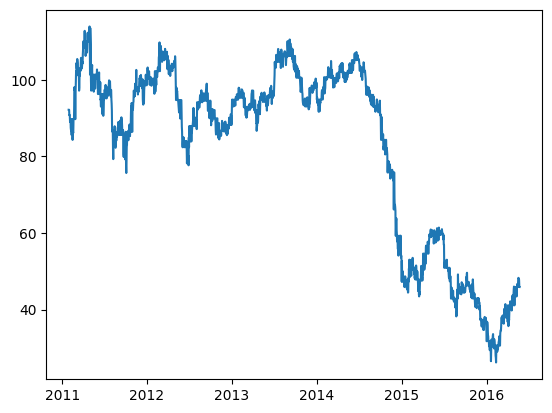

In [192]:
import matplotlib.pyplot as plot
plot.plot(final_data["date"], final_data["wti"])

In [193]:
final_data_path = os.path.join(current_dir, '../data/raw/Dataframe_Final_Data.csv')

final_data.to_csv(final_data_path, index=False)

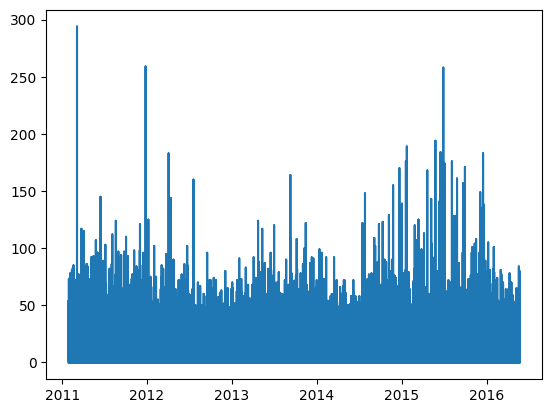

In [194]:
import matplotlib.pyplot as plt

plt.plot(final_data["date"], final_data["sales"])